<a href="https://colab.research.google.com/github/R-profit/Pro_Riesgo_Finanzas/blob/main/Creando%20estrategia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

In [ ]:
pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29412 sha256=5319746dbd4d3a038144b8a5b0e0d98b47af98e87e9bdb7a1acb56d323ea2b37
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [ ]:
pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.8 MB/s eta 0:00:00


In [ ]:
pip install scikit-plot

In [ ]:
#Funciones numericas adicionales
import numpy as np

#lectura de datos y Manejo data-sets
import pandas as pd

#graficos
import matplotlib.pyplot as plt

#datos
import yfinance as yfin

#velas japonesas
import mplfinance as mpf

import pandas_datareader as pdr

#analisis tecnico
import ta

import scikitplot as skplt



In [ ]:
df = yfin.download('ETH-USD', start='2019-09-01', end='2021-09-01')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516
...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731


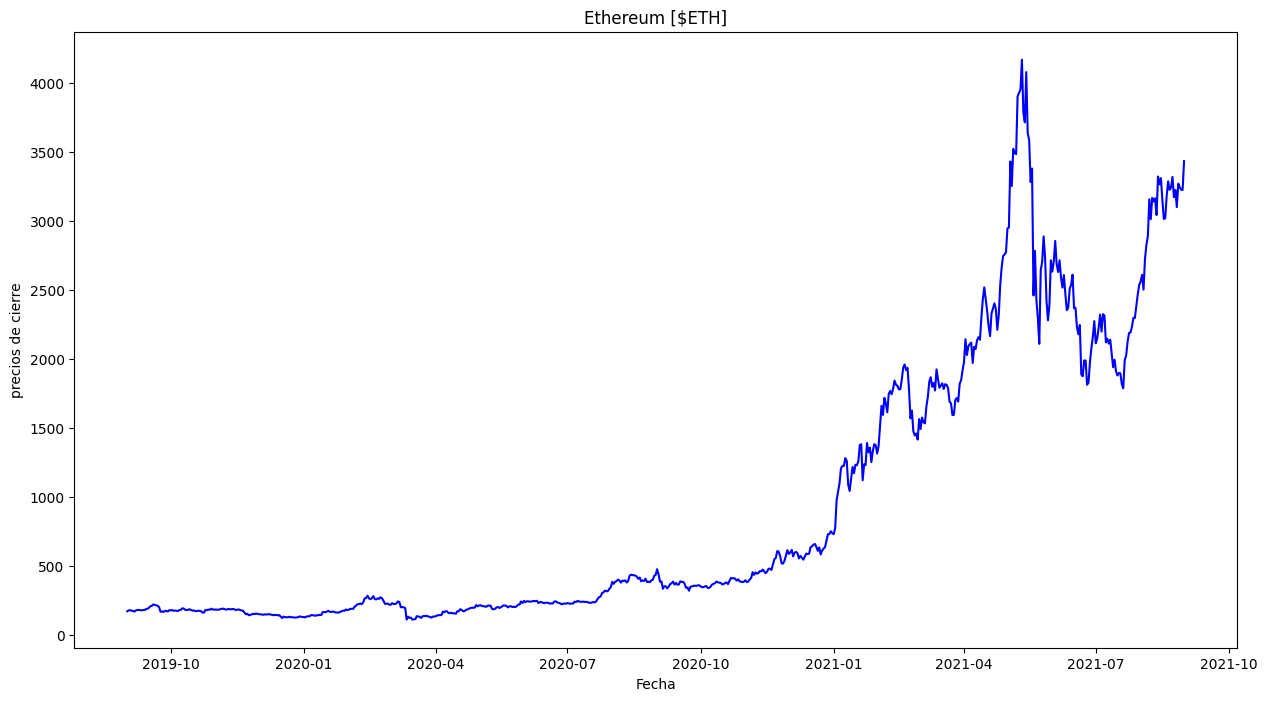

In [ ]:
#grafico de los precios de cierre
plt.figure(figsize=(15,8))
plt. plot(df['Close'], color = 'blue')
plt.title('Ethereum [$ETH]')
plt.xlabel('Fecha')
plt.ylabel('precios de cierre')
plt.show()

In [ ]:
#retornos aritmeticos
df['Adj Close t-1'] = df['Adj Close'].shift(1)
df['Returns'] = (df['Adj Close'] - df['Adj Close t-1'])/df['Adj Close t-1']
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns
Date,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090
...,...,...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,3244.403320,-0.005363


In [ ]:
#retornos logaritmicos
df['log returns'] = np.log(df['Adj Close']) - np.log(df['Adj Close t-1'])
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log returns
Date,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN,NaN
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142,0.038395
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459,0.006438
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535,-0.019728
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090,-0.010141
...,...,...,...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,3244.403320,-0.005363,-0.005378


In [ ]:
# estadisticas describtivas
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log returns
count,731.000000,731.000000,731.000000,731.000000,731.000000,7.310000e+02,730.000000,730.000000,730.000000
mean,912.624801,949.189126,873.568231,917.074084,917.074084,1.877284e+10,913.626606,0.005502,0.004104
std,1000.540016,1044.749523,952.357791,1004.444344,1004.444344,1.197694e+10,1000.795921,0.051814,0.053367
min,110.406784,116.021622,95.184303,110.605873,110.605873,5.109033e+09,110.605873,-0.423472,-0.550732
25%,188.170471,191.481842,184.261520,188.429153,188.429153,1.003360e+10,188.343948,-0.018351,-0.018521
50%,368.727539,380.021515,357.569763,369.136902,369.136902,1.512372e+10,368.996414,0.004581,0.004571
75%,1745.320190,1813.965942,1674.309570,1757.325928,1757.325928,2.374619e+10,1746.023468,0.031066,0.030593
max,4174.635742,4362.350586,3785.848633,4168.701172,4168.701172,8.448291e+10,4168.701172,0.259475,0.230695


In [ ]:
#Retorno Diario
Ret_P = np.mean(df['log returns'])

#Retorno diaria anualizada
Ret_a =Ret_P*(252)
Ret_a

1.0342582419921265

In [ ]:
#volatilidad diaria
vol_d = np.std(df['Returns'])

#volatilidad diaria anualizada
vol_a = vol_d*np.sqrt(252)
vol_a

0.821952541107564

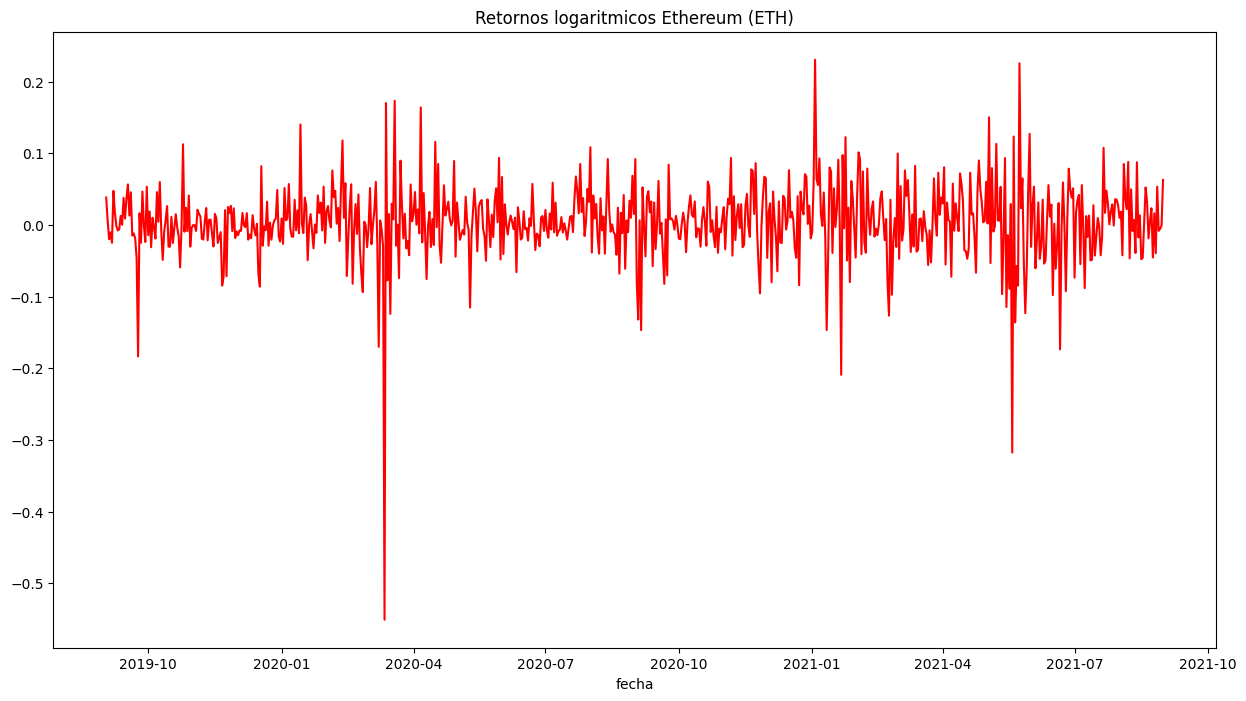

In [ ]:
#graficar retornos logaritmicos
plt.figure(figsize=(15,8))
plt. plot(df['log returns'], color = 'red')
plt.title('Retornos logaritmicos Ethereum (ETH)')
plt.xlabel('fecha')
plt.show()

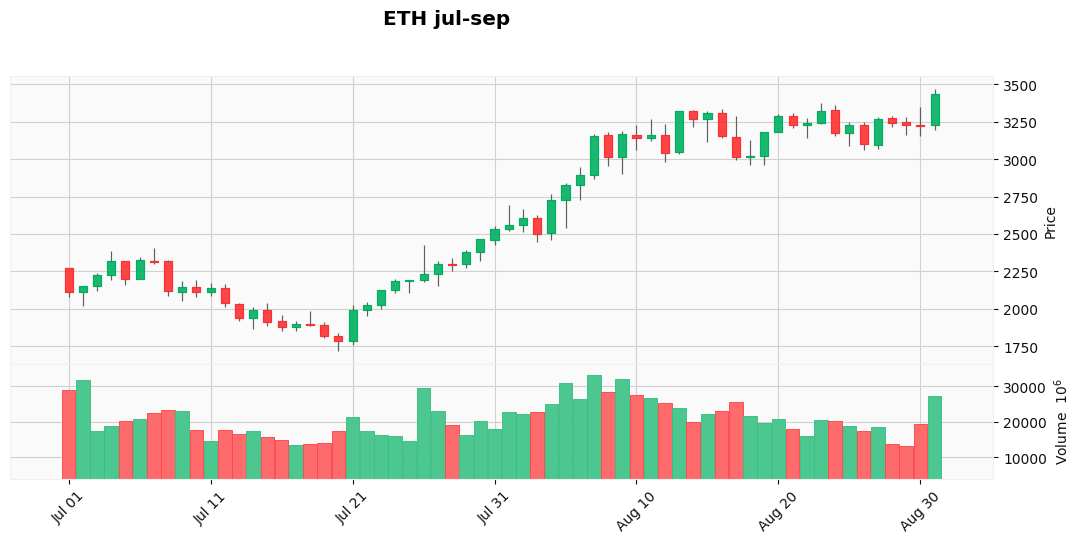

In [ ]:
#grafico velas ultimos 63 dias ETH

mpf.plot(df["2021-07-01":"2021-09-01"],
         type='candle',
         volume=True,
         figratio=(19,8),
         style='yahoo',
         title='ETH jul-sep')

In [ ]:
#descargar 2 año de datos del S$P 500
df2 = yfin.download('^GSPC', start='2019-09-01', end='2021-09-01')
df2

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-09-03,2909.010010,2914.389893,2891.850098,2906.270020,2906.270020,3427830000
2019-09-04,2924.669922,2938.840088,2921.860107,2937.780029,2937.780029,3167900000
2019-09-05,2960.600098,2985.860107,2960.600098,2976.000000,2976.000000,3902600000
2019-09-06,2980.330078,2985.030029,2972.510010,2978.709961,2978.709961,3209340000
2019-09-09,2988.429932,2989.429932,2969.389893,2978.429932,2978.429932,4031120000
...,...,...,...,...,...,...
2021-08-25,4490.450195,4501.709961,4485.660156,4496.189941,4496.189941,3444700000
2021-08-26,4493.750000,4495.899902,4468.990234,4470.000000,4470.000000,3263980000
2021-08-27,4474.100098,4513.330078,4474.100098,4509.370117,4509.370117,3331200000


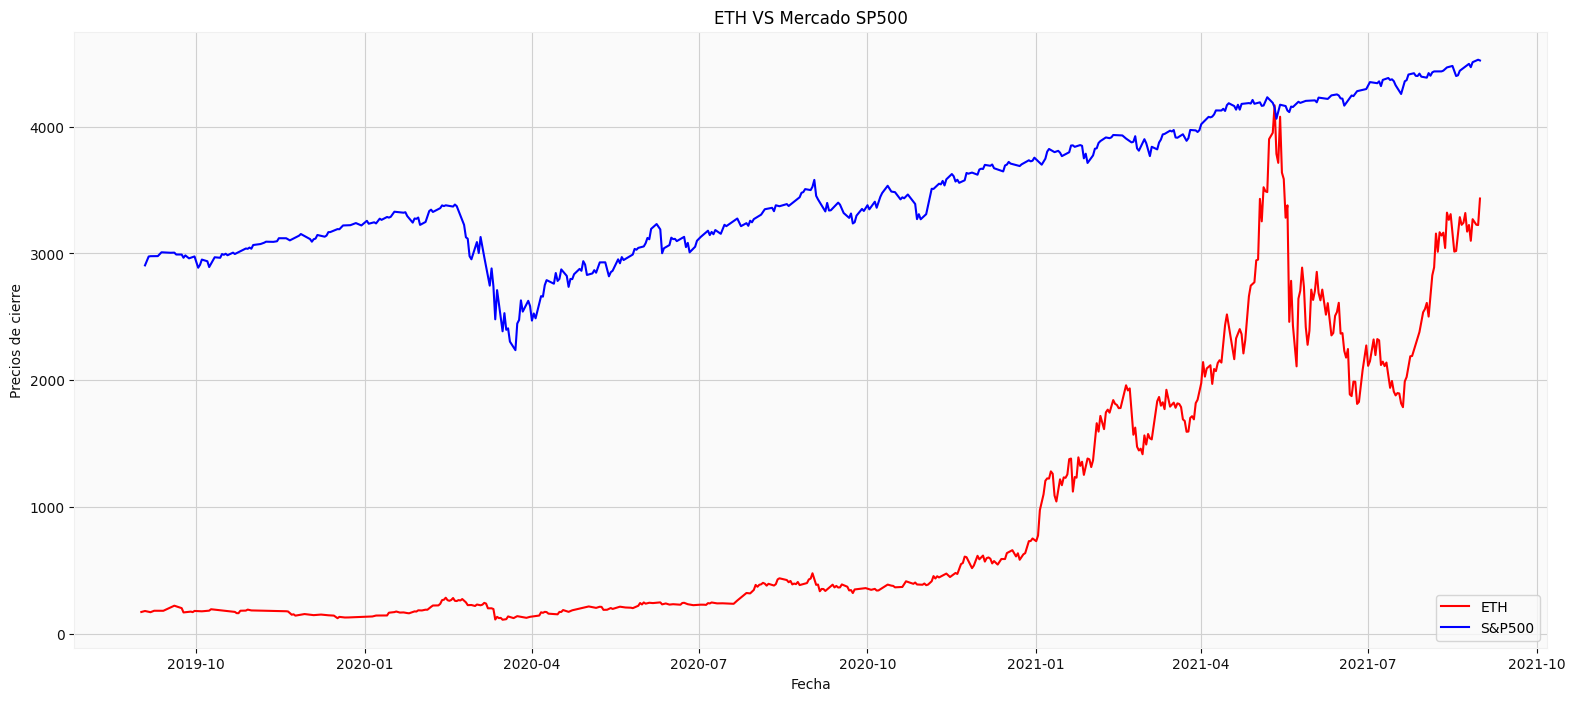

In [ ]:
#grafico de ETH vs mercado SP500
plt.figure(figsize=(19,8))
plt.title('ETH VS Mercado SP500')
plt.xlabel('Fecha')
plt.ylabel('Precios de cierre')
plt. plot(df['Close'], color='red')
plt. plot(df2['Close'], color='blue')
plt.legend(['ETH','S&P500'],loc='lower right')
plt.show()

In [ ]:
#escalar las series a un valor de 100usd
df['Close_100'] = (100/df['Close'][0])*df['Close']
df2['Close_100'] = (100/df2['Close'][0])*df2['Close']
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log returns,Close_100
Date,,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN,NaN,100.000000
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142,0.038395,103.914204
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459,0.006438,104.585405
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535,-0.019728,102.542375
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090,-0.010141,101.507730
...,...,...,...,...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467,1905.617775
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042,1890.353778
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,3244.403320,-0.005363,-0.005378,1880.215286


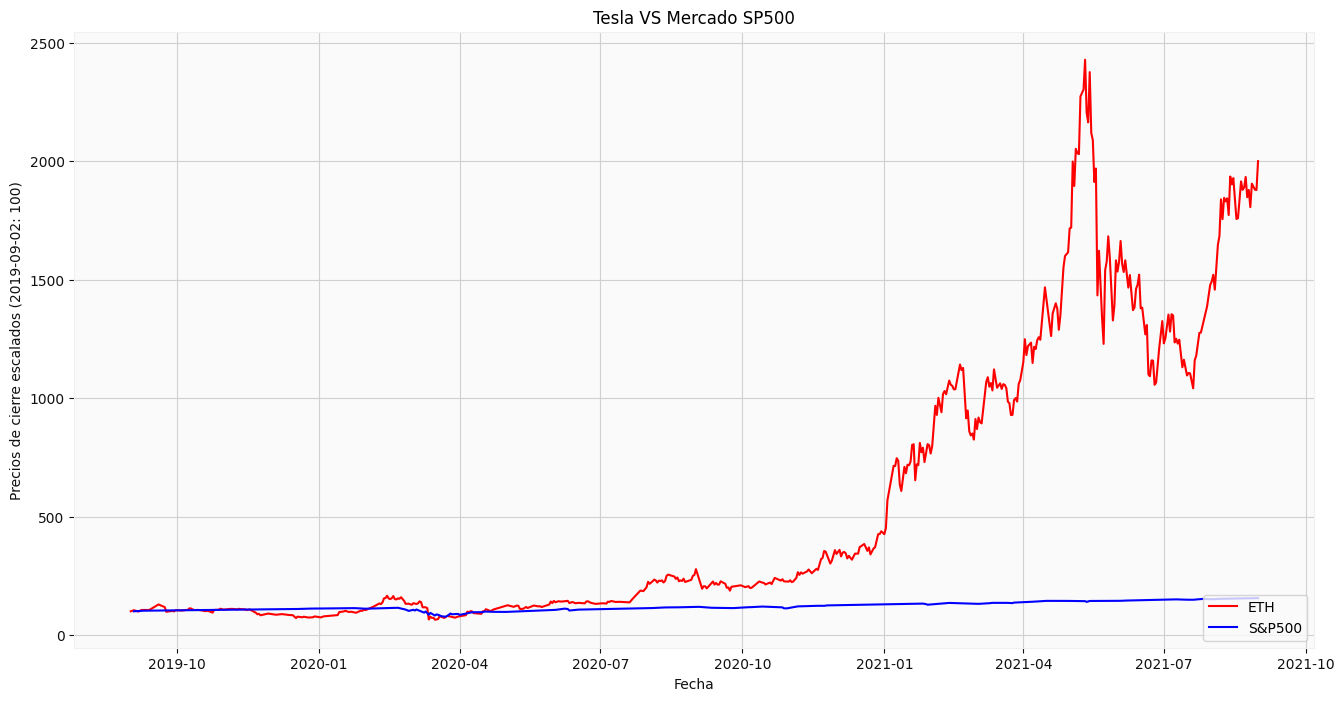

In [ ]:
#grafico de ETh vs mercado SP500
plt.figure(figsize=(16,8))
plt.title('Tesla VS Mercado SP500')
plt.xlabel('Fecha')
plt.ylabel('Precios de cierre escalados (2019-09-02: 100)')
plt. plot(df['Close_100'], color='red')
plt. plot(df2['Close_100'], color='blue')
plt.legend(['ETH','S&P500'],loc='lower right')
plt.show()

In [ ]:
#creacion de estrategia
#EMA 5 dias
df['EMA_short'] = df['Close'].ewm(span=5, adjust=False).mean()
#EMA 20 dias
df['EMA_long'] = df['Close'].ewm(span=20, adjust=False).mean()
df


,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log returns,Close_100,EMA_short,EMA_long
Date,,,,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN,NaN,100.000000,171.629425,171.629425
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142,0.038395,103.914204,173.868734,172.269228
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459,0.006438,104.585405,175.745599,172.957809
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535,-0.019728,102.542375,175.828029,173.246864
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090,-0.010141,101.507730,175.291063,173.339270
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467,1905.617775,3211.738433,3103.066208
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042,1890.353778,3222.626729,3116.526885
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,3244.403320,-0.005363,-0.005378,1880.215286,3224.085381,3127.048390


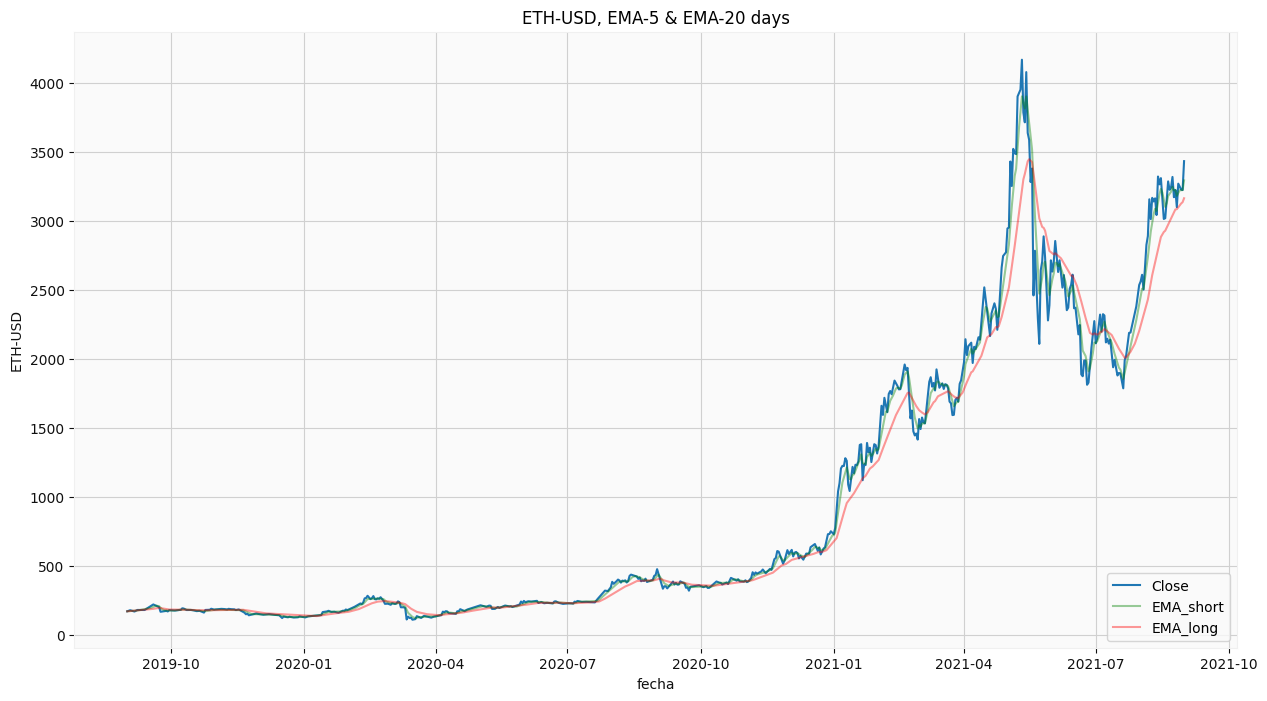

In [ ]:
#grafico de la serie de precios y sus medias moviles exponenciales
plt.figure(figsize=(15,8))
plt.title('ETH-USD, EMA-5 & EMA-20 days')
plt.plot(df['Close'])
plt.plot(df['EMA_short'], color='green',alpha=0.4)
plt.plot(df['EMA_long'], color='red',alpha=0.4)
plt.xlabel('fecha')
plt.ylabel('ETH-USD')
plt.legend(['Close','EMA_short','EMA_long'],loc ='lower right')
plt.show()

In [ ]:
# numero de datos

N = len(df)

#lista de señales
#-1 vender
#0 mantener
#1 comprar
signals =[0]

for i in range(1, N):
  short = df['EMA_short'][i]
  long = df['EMA_long'][i]

  p_short = df['EMA_short'][i-1]
  p_long = df['EMA_long'][i-1]

  if p_short < p_long and short >= long:
      signals.append(1)

  elif p_short > p_long and short <= long:
      signals.append(-1)

  else:
    signals.append(0)



df['Signals'] = signals
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log returns,Close_100,EMA_short,EMA_long,Signals
Date,,,,,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN,NaN,100.000000,171.629425,171.629425,0
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142,0.038395,103.914204,173.868734,172.269228,0
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459,0.006438,104.585405,175.745599,172.957809,0
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535,-0.019728,102.542375,175.828029,173.246864,0
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090,-0.010141,101.507730,175.291063,173.339270,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467,1905.617775,3211.738433,3103.066208,0
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042,1890.353778,3222.626729,3116.526885,0
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,3244.403320,-0.005363,-0.005378,1880.215286,3224.085381,3127.048390,0


In [ ]:
df['Buy'] = np.where(df['Signals']==1, df['Close'], np.nan)
df['Sell'] = np.where(df['Signals']==-1, df['Close'], np.nan)
df


,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log returns,Close_100,EMA_short,EMA_long,Signals,Buy,Sell
Date,,,,,,,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN,NaN,100.000000,171.629425,171.629425,0,NaN,NaN
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142,0.038395,103.914204,173.868734,172.269228,0,NaN,NaN
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459,0.006438,104.585405,175.745599,172.957809,0,NaN,NaN
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535,-0.019728,102.542375,175.828029,173.246864,0,NaN,NaN
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090,-0.010141,101.507730,175.291063,173.339270,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467,1905.617775,3211.738433,3103.066208,0,NaN,NaN
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042,1890.353778,3222.626729,3116.526885,0,NaN,NaN
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,3244.403320,-0.005363,-0.005378,1880.215286,3224.085381,3127.048390,0,NaN,NaN


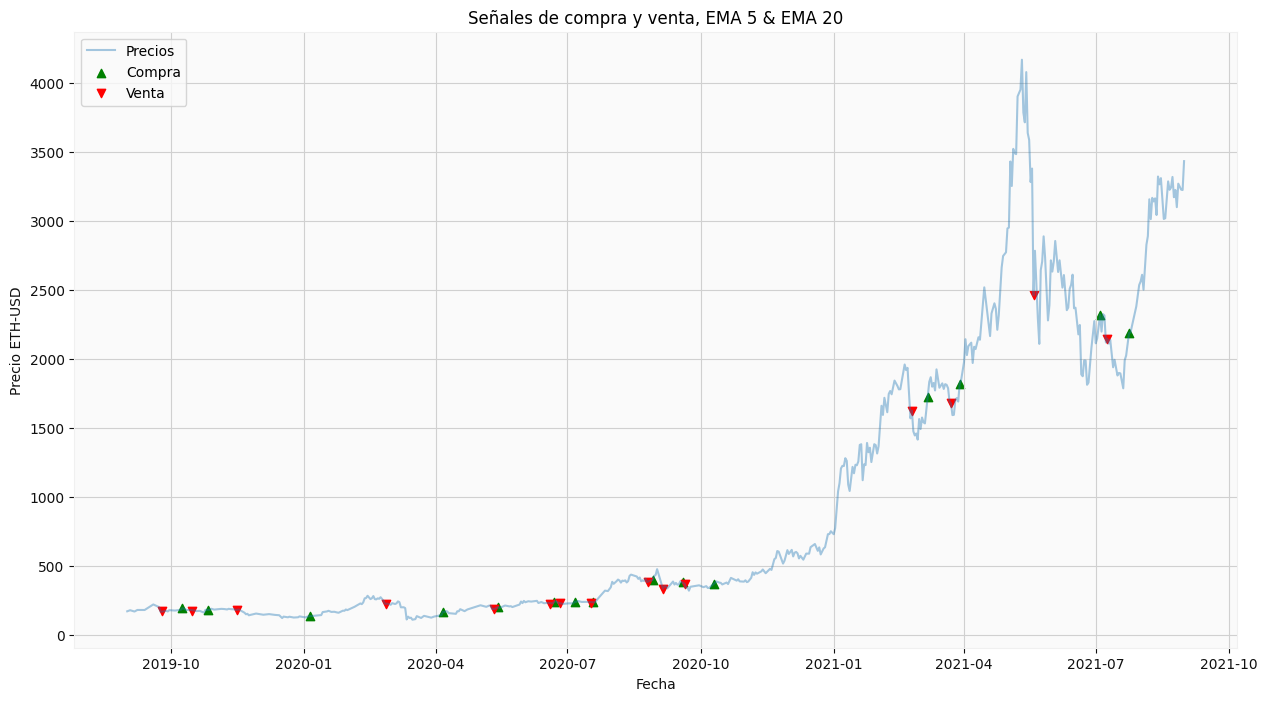

In [ ]:
plt.figure(figsize=(15,8))
plt.plot(df['Close'],alpha = 0.4, label ='Precios')

plt.scatter(df.index,df['Buy'], color = 'green', marker='^',label = 'Compra')
plt.scatter(df.index,df['Sell'], color = 'red', marker='v',label = 'Venta')

plt.title('Señales de compra y venta, EMA 5 & EMA 20')
plt.xlabel('Fecha')
plt.ylabel('Precio ETH-USD')
plt.legend(loc='upper left')

plt.show()


In [ ]:
#modelos de machine learning
#EMA
df['EMA_5'] = ta.trend.ema_indicator(close=df['Close'],window=5, fillna=True)/df['Close']
df['EMA_20'] = ta.trend.ema_indicator(close=df['Close'],window=20, fillna=True)/df['Close']
df['EMA_50'] = ta.trend.ema_indicator(close=df['Close'],window=50, fillna=True)/df['Close']
df['EMA_100'] = ta.trend.ema_indicator(close=df['Close'],window=100, fillna=True)/df['Close']

#indice de fuerza relativa
df['RSI'] = ta.momentum.rsi(close=df['Close'], fillna=True)

#rango verdadero medio
df['ATR'] = ta.volatility.average_true_range(high=df['High'], low=df['Low'], close=df['Close'], fillna=True)

#rango de porcenrtaje de williams
df['WR'] = ta.momentum.williams_r(high=df['High'], low=df['Low'], close=df['Close'], fillna=True)
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log returns,Close_100,...,Signals,Buy,Sell,EMA_5,EMA_20,EMA_50,EMA_100,RSI,ATR,WR
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN,NaN,100.000000,...,0,NaN,NaN,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,-49.631312
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142,0.038395,103.914204,...,0,NaN,NaN,0.974888,0.965920,0.963810,0.963078,100.000000,0.000000,-16.938736
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459,0.006438,104.585405,...,0,NaN,NaN,0.979088,0.963557,0.959286,0.957751,100.000000,0.000000,-22.226164
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535,-0.019728,102.542375,...,0,NaN,NaN,0.999063,0.984397,0.979246,0.977292,66.182233,0.000000,-49.584502
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090,-0.010141,101.507730,...,0,NaN,NaN,1.006164,0.994961,0.989649,0.987505,55.876558,0.000000,-63.439513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467,1905.617775,...,0,NaN,NaN,0.982003,0.948776,0.860722,0.797242,59.573910,183.762386,-24.805592
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042,1890.353778,...,0,NaN,NaN,0.993288,0.960586,0.872862,0.807567,58.404957,175.453814,-31.128057
2021-08-29,3246.770996,3283.235596,3158.840332,3227.002686,3227.002686,13296586731,3244.403320,-0.005363,-0.005378,1880.215286,...,0,NaN,NaN,0.999096,0.969026,0.882369,0.815646,57.596556,171.806775,-35.327498


In [ ]:
cl= np.array(df['Close'])
target = np.where(cl[1:] > cl[:-1], 1,-1)

df.drop(df.tail(1).index, inplace=True)

df['Target'] = target
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log returns,Close_100,...,Buy,Sell,EMA_5,EMA_20,EMA_50,EMA_100,RSI,ATR,WR,Target
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-01,172.458405,173.696854,169.531281,171.629425,171.629425,5554799576,NaN,NaN,NaN,100.000000,...,NaN,NaN,1.000000,1.000000,1.000000,1.000000,100.000000,0.000000,-49.631312,1
2019-09-02,171.697601,180.145218,170.451691,178.347351,178.347351,6503447137,171.629425,0.039142,0.038395,103.914204,...,NaN,NaN,0.974888,0.965920,0.963810,0.963078,100.000000,0.000000,-16.938736,1
2019-09-03,178.357758,182.347992,175.970169,179.499329,179.499329,6962728938,178.347351,0.006459,0.006438,104.585405,...,NaN,NaN,0.979088,0.963557,0.959286,0.957751,100.000000,0.000000,-22.226164,-1
2019-09-04,179.491989,180.136597,175.325363,175.992889,175.992889,5938120494,179.499329,-0.019535,-0.019728,102.542375,...,NaN,NaN,0.999063,0.984397,0.979246,0.977292,66.182233,0.000000,-49.584502,-1
2019-09-05,175.966278,176.163910,171.746826,174.217133,174.217133,5589476516,175.992889,-0.010090,-0.010141,101.507730,...,NaN,NaN,1.006164,0.994961,0.989649,0.987505,55.876558,0.000000,-63.439513,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,3228.747314,3249.655273,3060.228760,3100.325439,3100.325439,17405668117,3224.915283,-0.038634,-0.039400,1806.406704,...,NaN,NaN,1.026443,0.995196,0.901998,0.836707,54.019643,181.178303,-65.899581,1
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467,1905.617775,...,NaN,NaN,0.982003,0.948776,0.860722,0.797242,59.573910,183.762386,-24.805592,-1
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042,1890.353778,...,NaN,NaN,0.993288,0.960586,0.872862,0.807567,58.404957,175.453814,-31.128057,-1


In [ ]:
df.drop(df.head(29).index, inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume,Adj Close t-1,Returns,log returns,Close_100,...,Buy,Sell,EMA_5,EMA_20,EMA_50,EMA_100,RSI,ATR,WR,Target
Date,,,,,,,,,,,,,,,,,,,,,
2019-09-30,170.461349,179.872208,167.036606,179.872208,179.872208,7552915148,170.503479,0.054947,0.053491,104.802663,...,NaN,NaN,0.981724,1.026160,1.011797,0.991137,46.844385,10.322086,-65.407042,-1
2019-10-01,180.209122,185.045532,175.812653,177.340424,177.340424,7676276225,179.872208,-0.014075,-0.014175,103.327517,...,NaN,NaN,0.997160,1.036923,1.025213,1.005183,45.265635,10.244285,-69.258170,1
2019-10-02,177.224060,180.826126,175.334274,180.710510,180.710510,6335595250,177.340424,0.019003,0.018825,105.291100,...,NaN,NaN,0.985709,1.015911,1.005854,0.986705,47.788096,9.904826,-64.131889,-1
2019-10-03,180.703705,180.799210,172.599869,175.199341,175.199341,6381403725,180.710510,-0.030497,-0.030972,102.080014,...,NaN,NaN,1.011144,1.043309,1.036025,1.017392,44.200688,9.783005,-71.972218,1
2019-10-04,175.238434,178.552078,173.564087,176.985001,176.985001,6248928449,175.199341,0.010192,0.010141,103.120430,...,NaN,NaN,1.000628,1.029661,1.024569,1.006987,45.624984,9.440504,-68.893458,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-26,3228.747314,3249.655273,3060.228760,3100.325439,3100.325439,17405668117,3224.915283,-0.038634,-0.039400,1806.406704,...,NaN,NaN,1.026443,0.995196,0.901998,0.836707,54.019643,181.178303,-65.899581,1
2021-08-27,3096.406006,3281.840576,3064.485107,3270.600830,3270.600830,18489602004,3100.325439,0.054922,0.053467,1905.617775,...,NaN,NaN,0.982003,0.948776,0.860722,0.797242,59.573910,183.762386,-24.805592,-1
2021-08-28,3275.104492,3284.845947,3217.403564,3244.403320,3244.403320,13709633698,3270.600830,-0.008010,-0.008042,1890.353778,...,NaN,NaN,0.993288,0.960586,0.872862,0.807567,58.404957,175.453814,-31.128057,-1


In [ ]:
X = np.array(df.iloc[:,6:-1])
Y = np.array(df['Target'])

print(X.shape)
print(Y.shape)

(701, 16)
(701,)


In [ ]:
#scikit learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

from sklearn.svm import SVC

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)

print(X_train.shape)
print(X_test.shape)

(630, 16)
(71, 16)


In [ ]:
ss = StandardScaler()
ss = ss.fit(X_train)

X_train = ss.transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
# support vector machine
svc = SVC()
svc = svc.fit(X_train, Y_train)


ValueError: ignored